In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [372]:
import os
test_train_path = 'C:\\Users\\yeohy\\Google Drive\\Personal\\Projects\\Intel Image Classification\\Dataset'
os.listdir(test_train_dir)

['Predictions', 'Test', 'Train']

In [373]:
train_path = test_train_path+'\\Train'

In [374]:
test_path = test_train_path+'\\Test'

In [375]:
width_arr = []
height_arr = []
for filename in os.listdir(train_path+'\\buildings'):

    img = imread(train_path+'\\buildings' + '\\'+filename)
    width,height,channels = img.shape
    width_arr.append(width)
    height_arr.append(height)

In [376]:
# sns.jointplot(width_arr,height_arr)

In [377]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [378]:
image_gen = ImageDataGenerator(width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest')

In [379]:
image_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [380]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


In [381]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [382]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [383]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [384]:
from tensorflow.keras.callbacks import EarlyStopping

In [385]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=4)

In [386]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=16,
                                               )

Found 14034 images belonging to 6 classes.


In [387]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=16,
                                                shuffle=False
                                               )

Found 3000 images belonging to 6 classes.


In [388]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
results = model.fit_generator(train_image_gen,validation_data=test_image_gen,callbacks=[early_stop],epochs=20)

Epoch 1/20
878/878 [==============================] - 448s 510ms/step - loss: 1.1054 - accuracy: 0.5588 - val_loss: 0.8243 - val_accuracy: 0.6883
Epoch 2/20
878/878 [==============================] - 443s 505ms/step - loss: 0.8473 - accuracy: 0.6816 - val_loss: 0.6424 - val_accuracy: 0.7630
Epoch 3/20
878/878 [==============================] - 455s 518ms/step - loss: 0.7108 - accuracy: 0.7442 - val_loss: 0.5862 - val_accuracy: 0.7983
Epoch 4/20
878/878 [==============================] - 510s 581ms/step - loss: 0.6527 - accuracy: 0.7667 - val_loss: 0.5644 - val_accuracy: 0.7980
Epoch 5/20
878/878 [==============================] - 485s 553ms/step - loss: 0.6003 - accuracy: 0.7854 - val_loss: 0.5455 - val_accuracy: 0.8083
Epoch 6/20
878/878 [==============================] - 526s 599ms/step - loss: 0.5910 - accuracy: 0.7897 - val_loss: 0.5774 - val_accuracy: 0.7930
Epoch 7/20
878/878 [==============================] - 487s 554ms/step - loss: 0.5545 - accuracy: 0.8070 - val_loss: 0.6385 -

In [84]:
# help(Conv2D)

In [284]:
from tensorflow.keras.models import load_model
model = load_model('natural_scene_prediction__v3.h5')

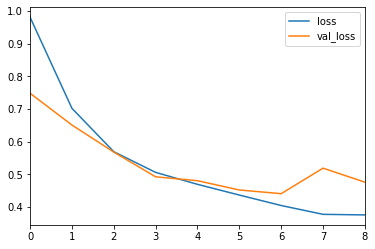

In [287]:
metrics[['loss','val_loss']].plot()

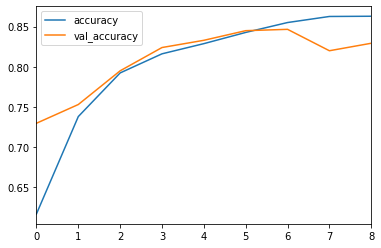

In [288]:
metrics[['accuracy','val_accuracy']].plot()

In [289]:
model.evaluate_generator(test_image_gen)

[0.4516128695649194, 0.84533334]

In [290]:
from tensorflow.keras.preprocessing import image

In [291]:
pred_prob = model.predict_generator(test_image_gen)

In [292]:
pred_prob

array([[9.9911505e-01, 5.8474268e-07, 3.9020058e-04, 1.3675113e-04,
        3.2501525e-04, 3.2345448e-05],
       [5.8044964e-01, 1.0408788e-04, 2.3120287e-04, 1.1336517e-06,
        1.6257576e-04, 4.1905141e-01],
       [9.9598324e-01, 1.9572541e-08, 1.9351547e-04, 4.2121854e-05,
        1.6926135e-03, 2.0884809e-03],
       ...,
       [1.5466585e-03, 3.6794897e-02, 2.3054234e-03, 9.4409162e-01,
        9.2094513e-03, 6.0519804e-03],
       [8.4139836e-01, 2.7142307e-06, 3.8747306e-04, 4.8964768e-05,
        5.5241247e-04, 1.5761016e-01],
       [2.2119076e-03, 2.1644586e-03, 1.5905048e-03, 1.0138171e-05,
        4.3792033e-04, 9.9358505e-01]], dtype=float32)

In [293]:
test_image_gen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [294]:
predictions = np.argmax(pred_prob,axis=1)

In [296]:
predictions

array([0, 0, 0, ..., 3, 0, 5], dtype=int64)

In [297]:
from sklearn.metrics import classification_report,confusion_matrix

In [298]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       437
           1       0.98      0.94      0.96       474
           2       0.84      0.77      0.81       553
           3       0.76      0.85      0.80       525
           4       0.87      0.82      0.84       510
           5       0.82      0.89      0.86       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [299]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[361   2   2   4   9  59]
 [  4 447   4   3   3  13]
 [  4   1 428  88  23   9]
 [  5   2  49 445  22   2]
 [ 13   2  26  40 417  12]
 [ 42   4   1   2   6 446]]


In [300]:
from tensorflow.keras.models import load_model
model.save('natural_scene_prediction__v2.h5')

In [358]:
img_name = '101.jpg'

In [359]:
pred_img_path = f'C:\\Users\\yeohy\\Google Drive\\Personal\\Projects\\Intel Image Classification\\Dataset\\Predictions\\{img_name}'

In [360]:
pred_img = image.load_img(pred_img_path,target_size=(150,150))

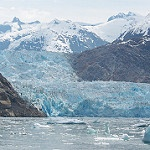

In [361]:
pred_img

In [362]:
pred_img_arr = image.img_to_array(pred_img)

In [363]:
pred_img_arr.shape

(150, 150, 3)

In [364]:
pred_img_arr = pred_img_arr.reshape(1,150,150,3)

In [365]:
pred_img_arr.shape

(1, 150, 150, 3)

In [366]:
classno = np.argmax(model.predict(pred_img_arr))

In [367]:
class_dict = train_image_gen.class_indices

In [368]:
class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [369]:
for key in class_dict:
    if class_dict[key] == classno:
        print(key)

glacier
